In [43]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
np.set_printoptions(threshold = sys.maxsize)

In [45]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [46]:
x  = dataset.iloc[:,2:4].values
y = dataset.iloc[:,4:].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc  = StandardScaler()
train = sc.fit_transform(x_train)
test = sc.transform(x_test)

In [51]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(random_state = 0)
cls.fit(train,y_train)

C:\Users\adith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [52]:
print(cls.predict(sc.transform([[40,10000]])))

[0]


In [53]:
y_pred  = cls.predict(test)

In [54]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_pred),1)),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0,

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

[[65  8]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



C:\Users\adith\AppData\Local\Temp\ipykernel_6476\2038163987.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set -- j,0], X_set[y_set -- j,1],c = ListedColormap(('red','green'))(i),label = j)


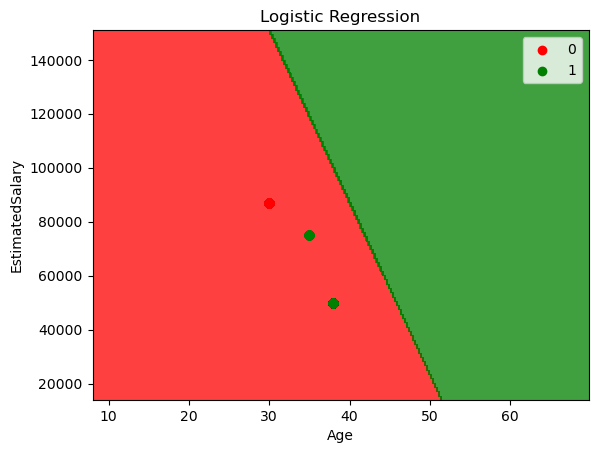

In [56]:
from matplotlib.colors import ListedColormap

X_set,y_set = sc.inverse_transform(test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-10,stop = X_set[:,0].max() + 10,step = 0.25),np.arange(start = X_set[:,1].min()-1000,stop = X_set[:,1].max() + 1000,step = 0.25))
plt.contourf(X1,X2,cls.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set -- j,0], X_set[y_set -- j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()